In [1]:
#Import required libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the dataset
data = pd.read_csv('D:/data science/parkinsons.csv')

In [3]:
# Display basic information about the dataset
print("Dataset Overview:")
print(data.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5883 entries, 0 to 5882
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5883 non-null   int64  
 1   age            5883 non-null   int64  
 2   sex            5883 non-null   int64  
 3   test_time      5883 non-null   float64
 4   total_UPDRS    5883 non-null   float64
 5   Jitter(%)      5880 non-null   float64
 6   Jitter(Abs)    5881 non-null   float64
 7   Jitter:RAP     5880 non-null   float64
 8   Jitter:PPQ5    5875 non-null   float64
 9   Jitter:DDP     5876 non-null   float64
 10  Shimmer        5865 non-null   float64
 11  Shimmer(dB)    5877 non-null   float64
 12  Shimmer:APQ3   5877 non-null   float64
 13  Shimmer:APQ5   5871 non-null   float64
 14  Shimmer:APQ11  5878 non-null   float64
 15  Shimmer:DDA    5877 non-null   float64
 16  NHR            5877 non-null   float64
 17  HNR            5882 non-null   flo

In [4]:
# Display the first few rows of the dataset
print("\nFirst Few Rows of the Dataset:")
print(data.head())


First Few Rows of the Dataset:
   subject#  age  sex  test_time  total_UPDRS  Jitter(%)  Jitter(Abs)  \
0         1   72    0     5.6431       34.398    0.00662     0.000034   
1         1   72    0     5.6431       34.398    0.00662     0.000034   
2         1   72    0    12.6660       34.894    0.00300     0.000017   
3         1   72    0    19.6810       35.389    0.00481     0.000025   
4         1   72    0    25.6470       35.810    0.00528     0.000027   

   Jitter:RAP  Jitter:PPQ5  Jitter:DDP  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.00401      0.00317     0.01204  ...        0.230       0.01438   
1     0.00401      0.00317     0.01204  ...        0.230       0.01438   
2         NaN      0.00150     0.00395  ...        0.179       0.00994   
3     0.00205      0.00208     0.00616  ...        0.181       0.00734   
4     0.00191          NaN     0.00573  ...        0.327       0.01106   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.

In [5]:
# Preprocess the data by handling missing values, encoding categorical variables
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
subject#          0
age               0
sex               0
test_time         0
total_UPDRS       0
Jitter(%)         3
Jitter(Abs)       2
Jitter:RAP        3
Jitter:PPQ5       8
Jitter:DDP        7
Shimmer          18
Shimmer(dB)       6
Shimmer:APQ3      6
Shimmer:APQ5     12
Shimmer:APQ11     5
Shimmer:DDA       6
NHR               6
HNR               1
RPDE              4
DFA               2
PPE               2
dtype: int64


In [12]:
data.dropna(inplace=True)

In [13]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5809 entries, 0 to 5881
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5809 non-null   int64  
 1   age            5809 non-null   int64  
 2   sex            5809 non-null   int64  
 3   test_time      5809 non-null   float64
 4   total_UPDRS    5809 non-null   float64
 5   Jitter(%)      5809 non-null   float64
 6   Jitter(Abs)    5809 non-null   float64
 7   Jitter:RAP     5809 non-null   float64
 8   Jitter:PPQ5    5809 non-null   float64
 9   Jitter:DDP     5809 non-null   float64
 10  Shimmer        5809 non-null   float64
 11  Shimmer(dB)    5809 non-null   float64
 12  Shimmer:APQ3   5809 non-null   float64
 13  Shimmer:APQ5   5809 non-null   float64
 14  Shimmer:APQ11  5809 non-null   float64
 15  Shimmer:DDA    5809 non-null   float64
 16  NHR            5809 non-null   float64
 17  HNR            5809 non-null   float64
 18  RPDE         

In [14]:
data.isnull()

,subject#,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5871,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5872,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5880,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
print(data.isnull().sum())

subject#         0
age              0
sex              0
test_time        0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64


In [16]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5809 entries, 0 to 5881
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5809 non-null   int64  
 1   age            5809 non-null   int64  
 2   sex            5809 non-null   int64  
 3   test_time      5809 non-null   float64
 4   total_UPDRS    5809 non-null   float64
 5   Jitter(%)      5809 non-null   float64
 6   Jitter(Abs)    5809 non-null   float64
 7   Jitter:RAP     5809 non-null   float64
 8   Jitter:PPQ5    5809 non-null   float64
 9   Jitter:DDP     5809 non-null   float64
 10  Shimmer        5809 non-null   float64
 11  Shimmer(dB)    5809 non-null   float64
 12  Shimmer:APQ3   5809 non-null   float64
 13  Shimmer:APQ5   5809 non-null   float64
 14  Shimmer:APQ11  5809 non-null   float64
 15  Shimmer:DDA    5809 non-null   float64
 16  NHR            5809 non-null   float64
 17  HNR            5809 non-null   float64
 18  RPDE         

In [17]:
 #Encode categorical variables (if any)
# Assuming the target variable is 'target_column', replace it accordingly
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])

In [18]:
# Split the data into features and target variable
X = data.drop('sex', axis=1)
y = data['sex']

In [19]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# 4) Random Forest Classifier and Evaluate Performance
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [22]:
# Train the classifier
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_scaled)

In [24]:
# Evaluate performance metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [25]:
# Display performance metrics
print("\nPerformance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Performance Metrics:
Accuracy: 0.98

Confusion Matrix:
[[774   9]
 [ 11 368]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       783
           1       0.98      0.97      0.97       379

    accuracy                           0.98      1162
   macro avg       0.98      0.98      0.98      1162
weighted avg       0.98      0.98      0.98      1162



In [27]:
# Evaluate Performance
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.35456110154905335


In [28]:
# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.04      0.08       783
           1       0.34      1.00      0.50       379

    accuracy                           0.35      1162
   macro avg       0.67      0.52      0.29      1162
weighted avg       0.78      0.35      0.22      1162



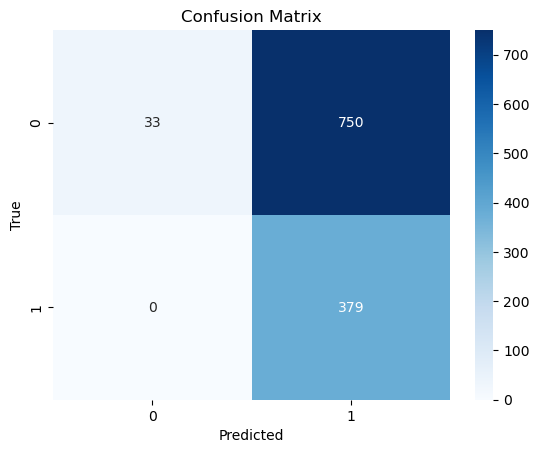

In [29]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()